<a href="https://colab.research.google.com/github/visu21ab/computational_bias_detection/blob/main/Evaluation_ABSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation

pre-requisite files:
- extracted aspects and their predicted sentiment
- extracted aspects and their annotated sentiments, size = 2000

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import metrics
import matplotlib.pyplot as plt
import scienceplots

In [4]:
# Set scienceplot style
plt.style.use(['science', 'no-latex'])
plt.rcParams['figure.figsize'] = (6.4, 4.8)

In [6]:
# Read data
data_pred = pd.read_csv('drive/MyDrive/Master Thesis/ukraine_violence_ABSA.csv')
data_true = pd.read_csv('drive/MyDrive/Master Thesis/ukraine_violence_ABSA_annoated.csv')

In [13]:
# Create subsets of data and data_pred
subset_size = 2000
data_pred_subset = data_pred.sample(n=subset_size, random_state=42)

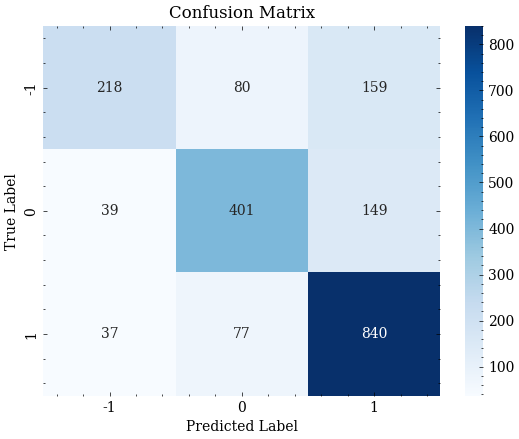

Confusion Matrix:
[[218  80 159]
 [ 39 401 149]
 [ 37  77 840]]

Accuracy: 0.730
F1 Score: 0.693
Precision: 0.731
Recall: 0.679


In [15]:
# extract labels
y_true = data_true['sentiment_score'].values
y_pred = data_pred_subset['sentiment_score'].values

# calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_true, y_pred)

# plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# calculate evaluation scores
accuracy = metrics.accuracy_score(y_true, y_pred)
f1_score = metrics.f1_score(y_true, y_pred, average='macro')
precision = metrics.precision_score(y_true, y_pred, average='macro')
recall = metrics.recall_score(y_true, y_pred, average='macro')

# print confusion matrix and evaluation scores
print('Confusion Matrix:')
print(conf_matrix)
print('\nAccuracy: {:.3f}'.format(accuracy))
print('F1 Score: {:.3f}'.format(f1_score))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
